In [1]:
import tensorflow as tf                                                                                                   #
import keras                                                                                                              #
import cv2                                                                                                                #
#================================                                                                                         #
from keras.models import Sequential                                                                                       #
from keras.preprocessing.image import ImageDataGenerator                                                                  #
from tensorflow.keras.utils import to_categorical                                                                         #
from keras.layers import Dense, Dropout, Activation, Flatten,MaxPooling2D,Convolution2D,Conv2D                            #
from keras import losses,optimizers,Sequential,layers                                                                     #
#================================                                                                                         #
import os                                                                                                                 #
import numpy as np                                                                                                        #
import matplotlib.pyplot as plt                                                                                           #
import pandas as pd                                                                                                       #
from PIL import Image                                                                                                     #
import matplotlib.pyplot as plt                                                                                           #
import seaborn as sns                                                                                                     #
#================================                                                                                         #
from sklearn.neural_network import MLPClassifier                                                                          #
from sklearn.model_selection import train_test_split                                                                      #
from sklearn.metrics._plot.confusion_matrix import confusion_matrix                                                       #
from sklearn import metrics as m                                                                                          #
from sklearn import preprocessing 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filepath=("/content/drive/MyDrive/Colab Notebooks/catdog/")                                      #
def get_data_set(filepath):                                                                                               #
    imgs=[]                                                                                                               #
    labels=[]                                                                                                             # 
    print('start readong files..')                                                                                        #
    for f in os.listdir(filepath):                                                                                        #
            #labels.append(f.split('.')[0])     #this line work but i tried my own idea                                   #
            labels.append(f[0:3])                                                                                         # 
            print('Reading fle :',f)                                                                                      #
            img=np.asarray(Image.open(filepath+f)) 
            img=cv2.resize(img,(500, 500))                                                                                #
            imgs.append(img/255)                                                                                          #
    print('Reading files finished')                                                                                       #
    return np.asarray(imgs),labels

In [4]:
imgs,labels = get_data_set(filepath)

start readong files..
Reading fle : cat.4002.jpg
Reading fle : cat.4003.jpg
Reading fle : cat.4004.jpg
Reading fle : cat.4005.jpg
Reading fle : cat.4012.jpg
Reading fle : cat.4001.jpg
Reading fle : cat.4006.jpg
Reading fle : cat.4013.jpg
Reading fle : cat.4017.jpg
Reading fle : cat.4016.jpg
Reading fle : cat.4024.jpg
Reading fle : cat.4023.jpg
Reading fle : cat.4014.jpg
Reading fle : cat.4025.jpg
Reading fle : cat.4026.jpg
Reading fle : cat.4027.jpg
Reading fle : cat.4015.jpg
Reading fle : cat.4036.jpg
Reading fle : cat.4035.jpg
Reading fle : cat.4028.jpg
Reading fle : cat.4049.jpg
Reading fle : cat.4037.jpg
Reading fle : cat.4034.jpg
Reading fle : cat.4048.jpg
Reading fle : cat.4047.jpg
Reading fle : cat.4050.jpg
Reading fle : cat.4039.jpg
Reading fle : dog.4003.jpg
Reading fle : cat.4038.jpg
Reading fle : cat.4045.jpg
Reading fle : cat.4046.jpg
Reading fle : dog.4002.jpg
Reading fle : dog.4001.jpg
Reading fle : dog.4004.jpg
Reading fle : dog.4006.jpg
Reading fle : dog.4005.jpg
Readin

In [5]:
                                                                                                                          #
le=preprocessing.LabelEncoder()                                                                                           #
#labels_N=le.fit(labels)                                                                                                  #
labels_N=le.fit_transform(labels) #fit label encoder and return encoded labels                                            #
labels_N=np.asarray(labels_N)

In [6]:
len(imgs)

60

In [7]:
HEIGHT=[]                                                                                                                 #
WIDTH=[]                                                                                                                  #
for i in range(len(imgs)) :                                                                                               #
    a,b,c=imgs[i].shape                                                                                                   #
    HEIGHT.append(a)                                                                                                      #
    WIDTH.append(b)                                                                                                       #
                                                                                                                          #
img_width, img_height = min(HEIGHT),min(WIDTH)

In [8]:
img_width, img_height

(500, 500)

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show() 

In [10]:
imgs.shape

(60, 500, 500, 3)

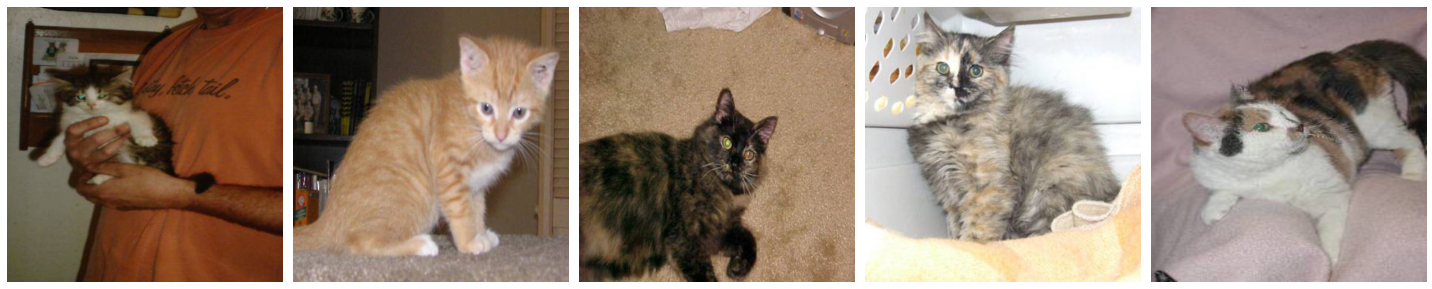

In [11]:
plotImages(imgs[:5])

In [12]:

# now here below we creating the object of the data augmentation class
imageDataGen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
# because as we alreay load image into the memory, so we are using flow() function, to apply transformation
iterator = imageDataGen.flow(imgs,labels_N, batch_size=60) # below we generate augmented images and plotting for visualization
data_imgs,label_test = iterator.next()    # again we convert back to the unsigned integers value of the image for viewing    
   

In [13]:
len(data_imgs)
label_test[:5]

array([0, 0, 0, 0, 0])

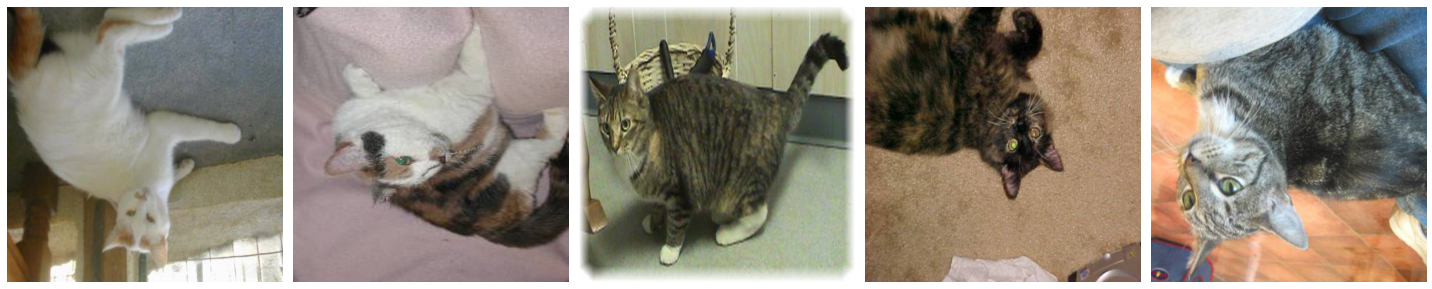

In [14]:
plotImages(data_imgs[:5])

In [15]:
def data_augmentation(imgs,labels_N):
  data=list(imgs)
  labels=list(labels_N)
  for i in range(10):
     # now here below we creating the object of the data augmentation class
     imageDataGen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
     # because as we alreay load image into the memory, so we are using flow() function, to apply transformation
     iterator = imageDataGen.flow(imgs,labels_N, batch_size=60)  # below we generate augmented images and plotting for visualization
     data_imgs,label_test = iterator.next() 
                                # again we convert back to the unsigned integers value of the image for viewing    
     data=data +list(data_imgs)
     labels=labels+list(label_test)
  data=np.array(data)
  labels=np.asarray(labels)
  return(data,labels)


In [16]:
im_base,labels = data_augmentation(imgs,labels_N)
len(labels)

660

In [17]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [18]:
im_base.shape

(660, 500, 500, 3)

In [19]:
labels[95:100]

array([0, 0, 0, 0, 1])

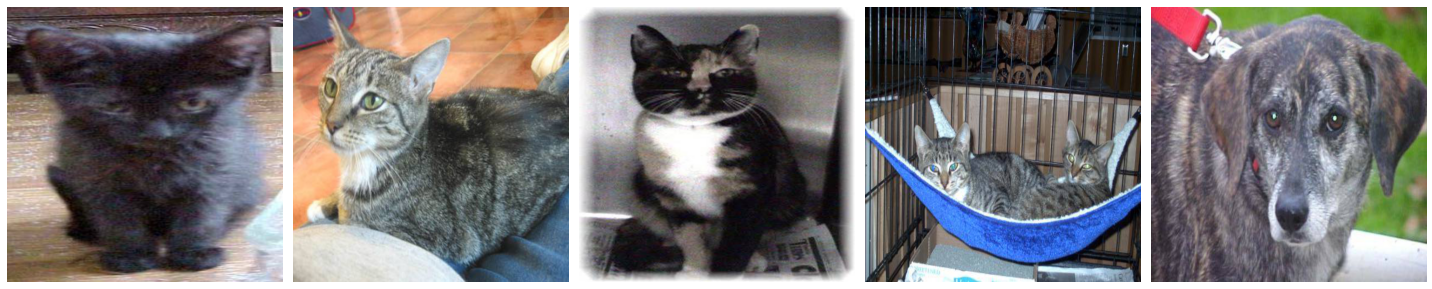

In [20]:
plotImages(im_base[95:100])

In [21]:
x_train,x_test,train_label,test_label = train_test_split(im_base,labels,test_size=1/3,random_state=0)

In [22]:


model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(img_width, img_height ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])



"""model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_width, img_height ,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2,activation='softmax'))"""

"model = Sequential()\nmodel.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_width, img_height ,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(32, 3, padding='same', activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Conv2D(64, 3, padding='same', activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(512, activation='relu'))\nmodel.add(Dense(2,activation='softmax'))"

In [23]:

model_new.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_new.summary()





"""model.compile(optimizer='adam',
                  loss= tf.keras.losses.categorical_crossentropy,
                  metrics=['accuracy'])"""


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 250, 250, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      1

"model.compile(optimizer='adam',\n                  loss= tf.keras.losses.categorical_crossentropy,\n                  metrics=['accuracy'])"

In [24]:
train_label1=to_categorical(train_label)                                                                                  #
#bech ifass5 l colonne lawla                                                                                              #
train_label1=train_label1[:,1:]                                                                                          #
test_label1=to_categorical(test_label)                                                                                    #
#bech ifass5 l colonne lawla                                                                                              #
test_label1=test_label1[:,1:]                                                                                            #


In [ ]:
#history=model.fit(x_train,train_label1,batch_size=32,epochs=20,validation_data=(x_test,test_label1)) 

history=model_new.fit(x_train,train_label,batch_size=32,epochs=15,validation_data=(x_test,test_label))                       #



Epoch 1/15


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#from keras.applications.imagenet_utils import decode_predictions
x=model_new.predict(x_test[111].reshape(1, 500, 500, 3)) 
if x[[0]] <= 0 :
    title="wow !! it's cat "
    print("wow !! it's cat ")
else :
    title="it' a dog"
    print("it' a dog ")
#if the result is positive then it a dog otherwise it's a cat 
plt.imshow(x_test[111])
plt.title(title)



In [ ]:
###########################################################################################################################
###########################################################################################################################

def predicta(n):
    x=model_new.predict(x_test[n].reshape(1, 500, 500, 3)) 
    if x[[0]] <= 0 :
        title="wow !! it's cat "
        print("wow !! it's cat ")
    else :
        title="it' a dog"
        print("it' a dog ")
    #if the result is positive then it a dog otherwise it's a cat 
    plt.imshow(x_test[n])
    plt.title(title)
    return(title)


In [ ]:
###########################################################################################################################
###########################################################################################################################

predicta(85)
#=========================
predicta(40)
#=========================
predicta(10)
#=========================
predicta(70)
#=========================